In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Note: This notebook cannot be run due to the raw interview data being unavailable to the public. However, we have included the analysis code in this repository for transparency.

# Data

In [2]:
# Load all, add user_id and combine

# Define the folder path
folder_path = 'XXX'

# List all files in the folder
files = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the files and read each one into a DataFrame
for file in files:
    file_path = os.path.join(folder_path, file)
    # Check if it's a file (not a directory) and has a valid format
    if os.path.isfile(file_path) and file.endswith('.csv'):
        # Extract user_id from the file name
        user_id = file.split('_')[1].split('.')[0]
        #print('user_id:', user_id)
        
        # Read the file into a DataFrame
        # Try reading the file with different encodings
        for encoding in ['utf-8', 'latin1', 'iso-8859-1', 'cp1252']:
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                break  # If reading is successful, break out of the loop
            except UnicodeDecodeError:
                continue  # If reading fails, try the next encoding

        # If all encodings fail, raise an error
        if 'df' not in locals():
            raise UnicodeDecodeError(f"Failed to read {file} with known encodings.")

        
        # Add the user_id column to the DataFrame
        df['user_id'] = user_id
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Now have a list of DataFrames with the user_id column added
# Concatenate them into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Strip leading and trailing white space
combined_df['theme'] = combined_df['theme'].str.strip()
combined_df['code'] = combined_df['code'].str.strip()

# Convert to int
combined_df['exists_in_text'] = combined_df['exists_in_text'].astype(int)

# Filter for columns we care about here
analysis_df = combined_df[['user_id', 'theme', 'code', 'exists_in_text']]

# Print the shape of the combined DataFrame to verify
print(f"Combined DataFrame shape: {analysis_df.shape}")

if analysis_df.shape[0]/len(files) == 45:
    print('All good!')

Combined DataFrame shape: (1890, 4)
All good!


In [3]:
analysis_df
analysis_df.info()

,user_id,theme,code,exists_in_text
0,9,Stewardship responsibilities,Individual,0
1,9,Stewardship responsibilities,Advice,1
2,9,Stewardship responsibilities,Guidelines,0
3,9,Individualisation,Quite individualised,0
4,9,Individualisation,Not very individualised,0
...,...,...,...,...
1885,32,Outcomes,Patient related outcomes,0
1886,32,Outcomes,Treatment failure rate,0
1887,32,Bottleneck,Infrastructure,1
1888,32,Bottleneck,Behavioural,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1890 non-null   object
 1   theme           1890 non-null   object
 2   code            1890 non-null   object
 3   exists_in_text  1890 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 59.2+ KB


In [4]:
# Drop some
analysis_df = analysis_df[(analysis_df['code'] != 'Composite') & (analysis_df['code'] != 'Uncertainty')]

In [5]:
analysis_df.user_id.nunique()
analysis_df.theme.nunique()
analysis_df.code.nunique()

42

11

42

# Plot

In [53]:
# Group by
grouped_df = analysis_df.groupby(['theme', 'code'])['exists_in_text'].sum()
grouped_df = pd.DataFrame(grouped_df)
grouped_df.reset_index(inplace=True)
grouped_df.rename(columns={'exists_in_text':'count'}, inplace=True)
grouped_df['percentage'] = round(grouped_df['count']/len(files) * 100, 2)

In [55]:
len(grouped_df)
grouped_df

43

,theme,code,count,percentage
0,Behavioural and social influences,Bias,8,19.05
1,Behavioural and social influences,Cautiousness,17,40.48
2,Behavioural and social influences,Hesitancy to change,10,23.81
3,Behavioural and social influences,Patient support system,3,7.14
4,Behavioural and social influences,Short vs long term impact,10,23.81
5,Bottleneck,Behavioural,21,50.00
6,Bottleneck,Infrastructure,19,45.24
7,Bottleneck,Uncertain decisions,14,33.33
8,Individualisation,Not very individualised,15,35.71
9,Individualisation,Quite individualised,22,52.38


In [41]:
def plot_theme_bar_chart(theme, df):
    # Filter the DataFrame for the given theme
    theme_df = df[df['theme'] == theme]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(theme_df['code'], theme_df['percentage'], color='skyblue')
    plt.xlabel('Code')
    plt.ylabel('Percentage of respondents')
    plt.title(f'Percentage of Codes for Theme: {theme}')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')

    # Annotate bars with percentage values
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

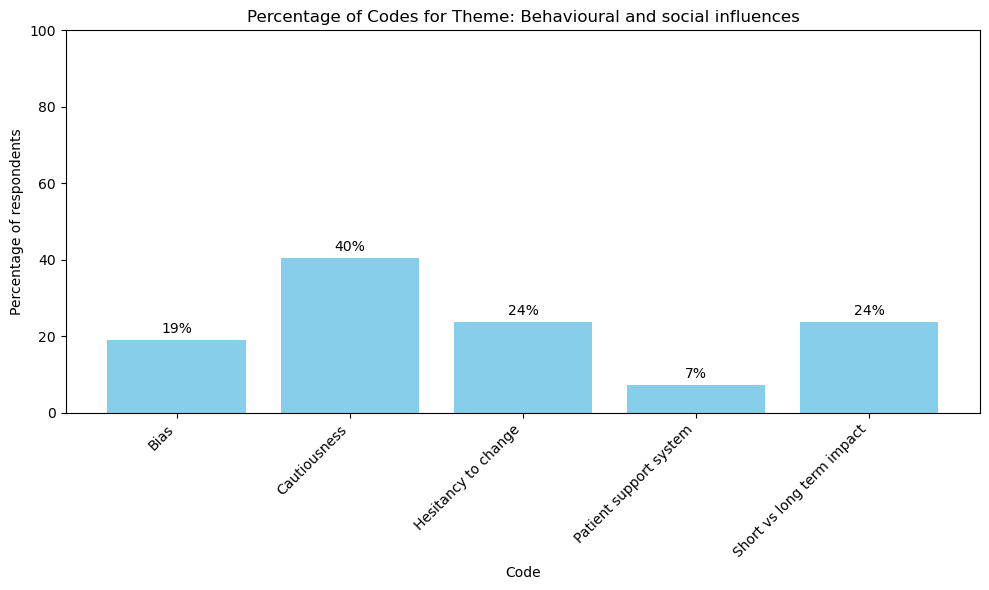

In [42]:
plot_theme_bar_chart('Behavioural and social influences', grouped_df)


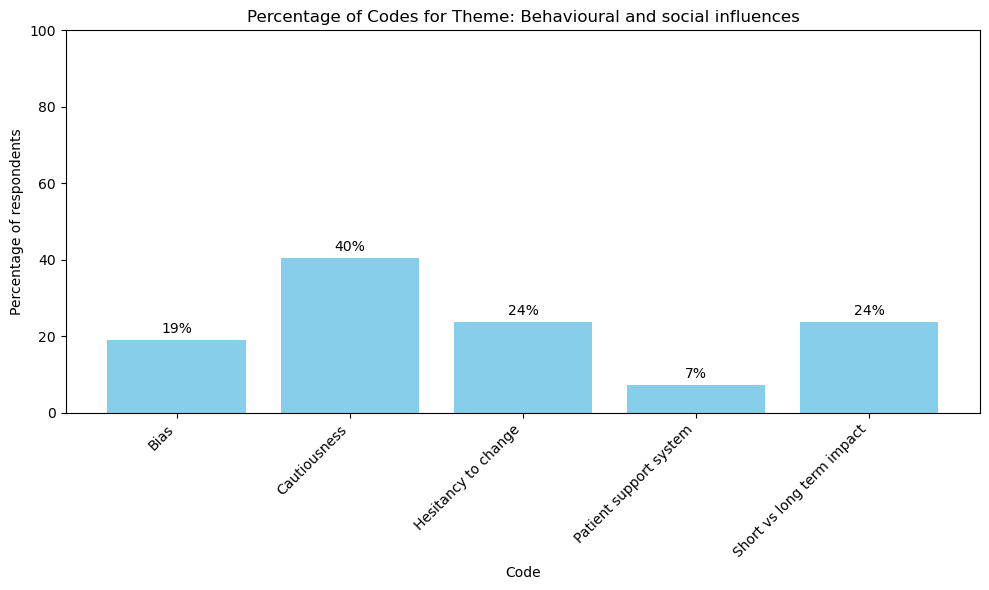

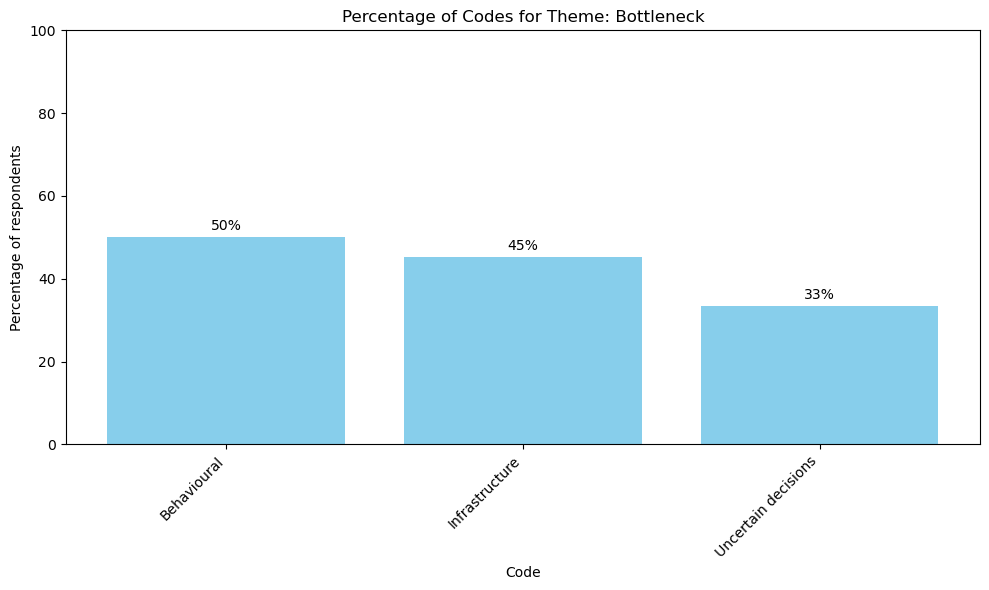

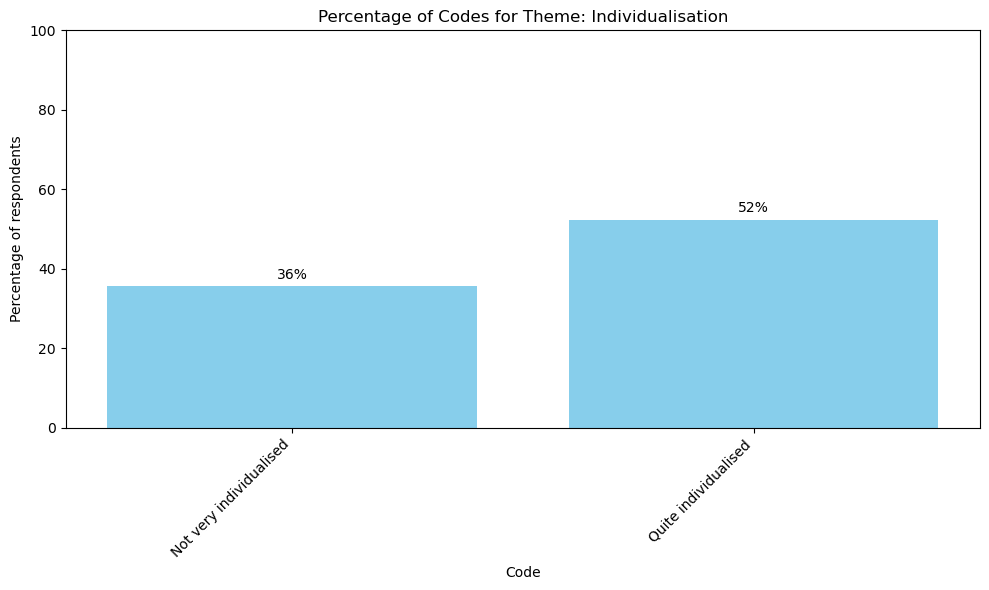

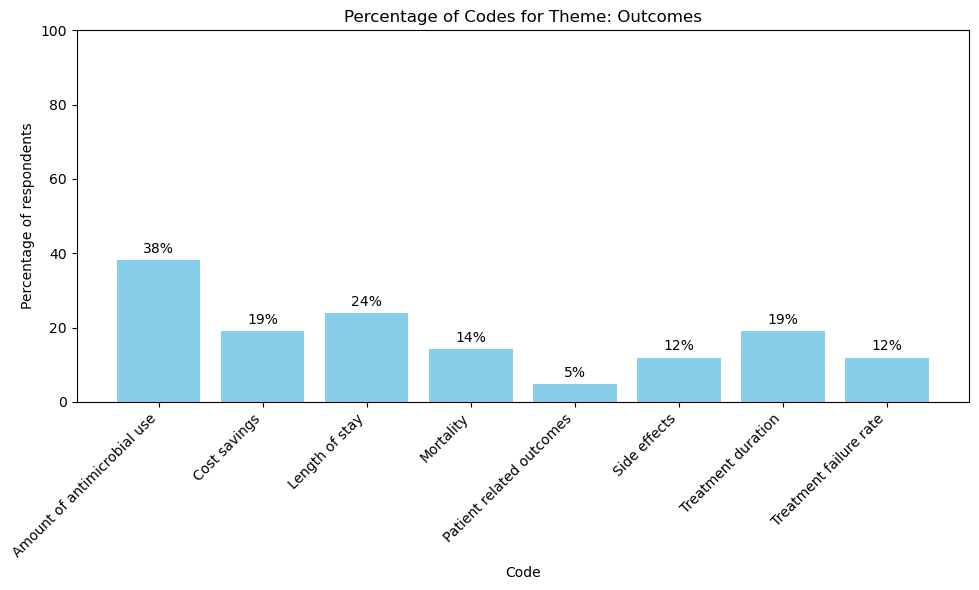

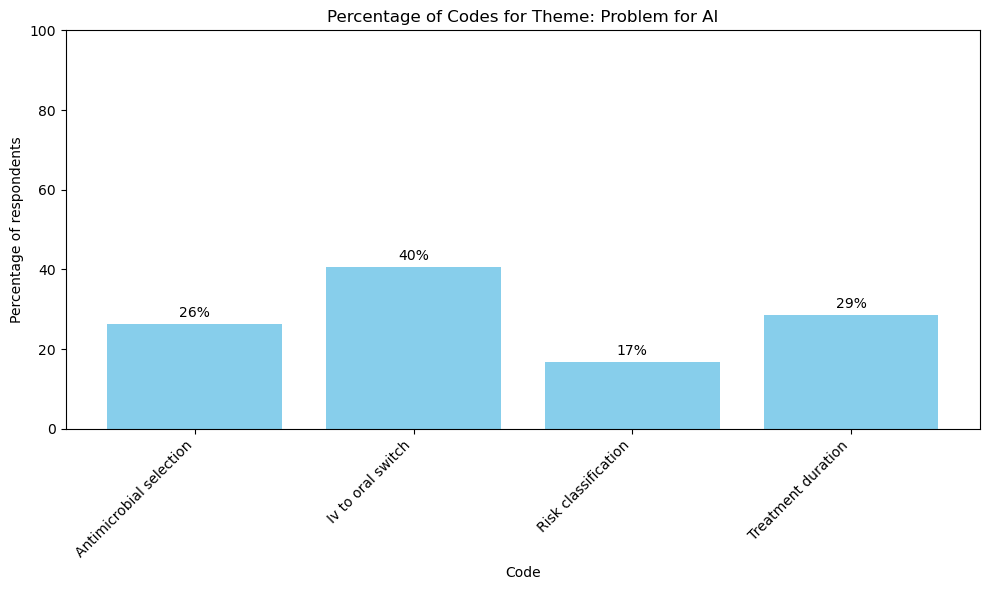

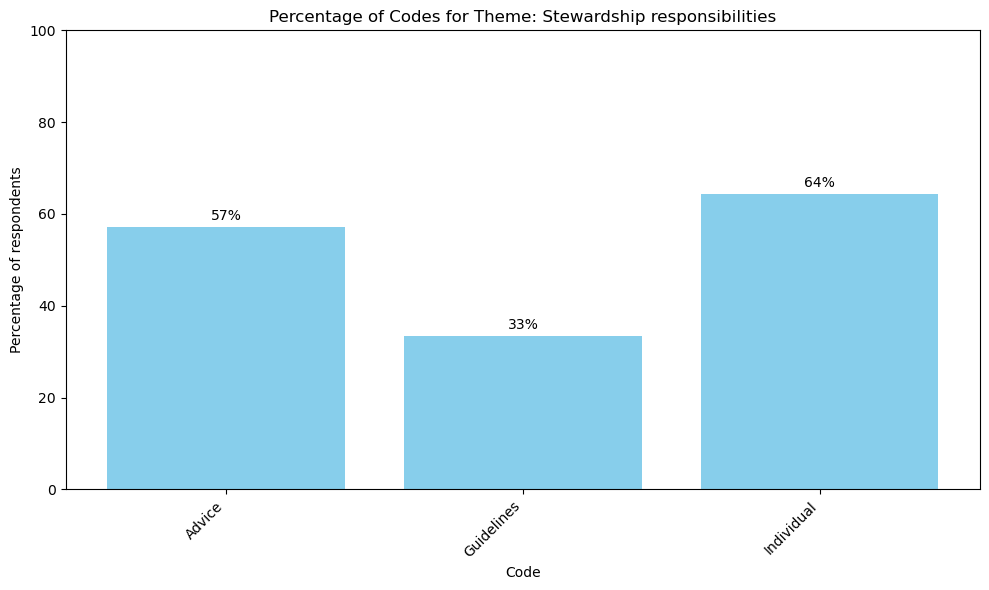

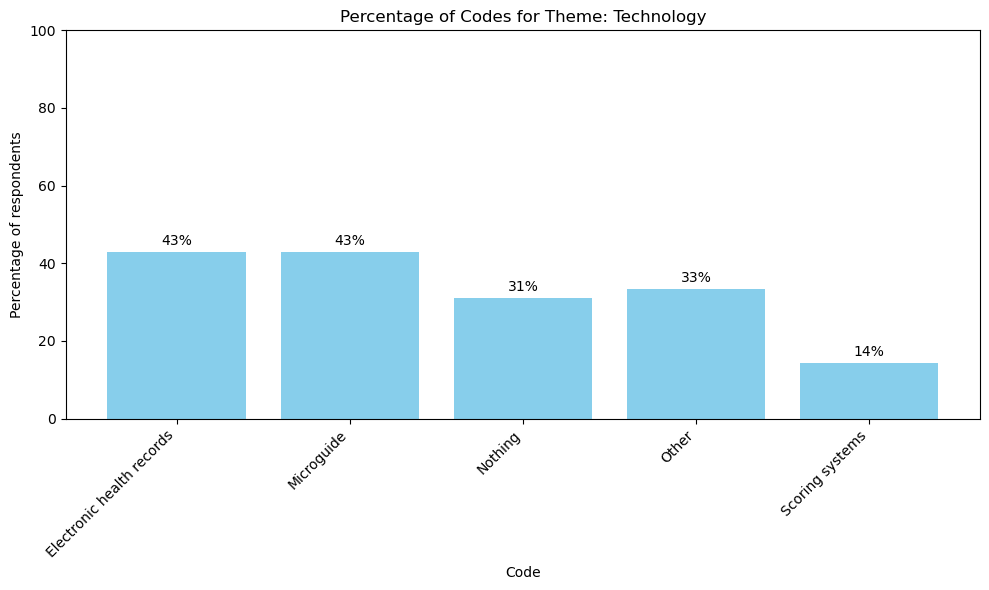

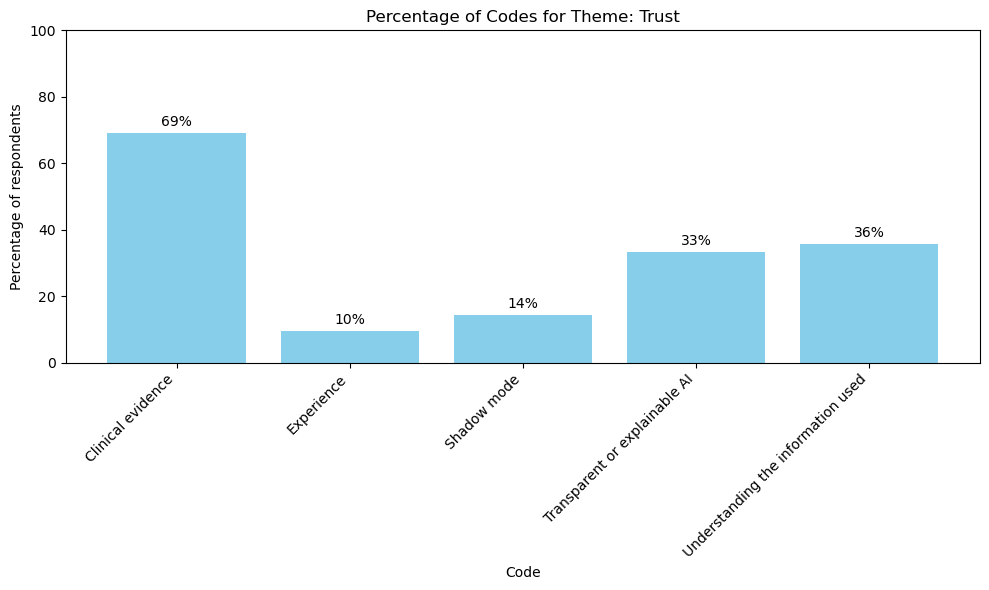

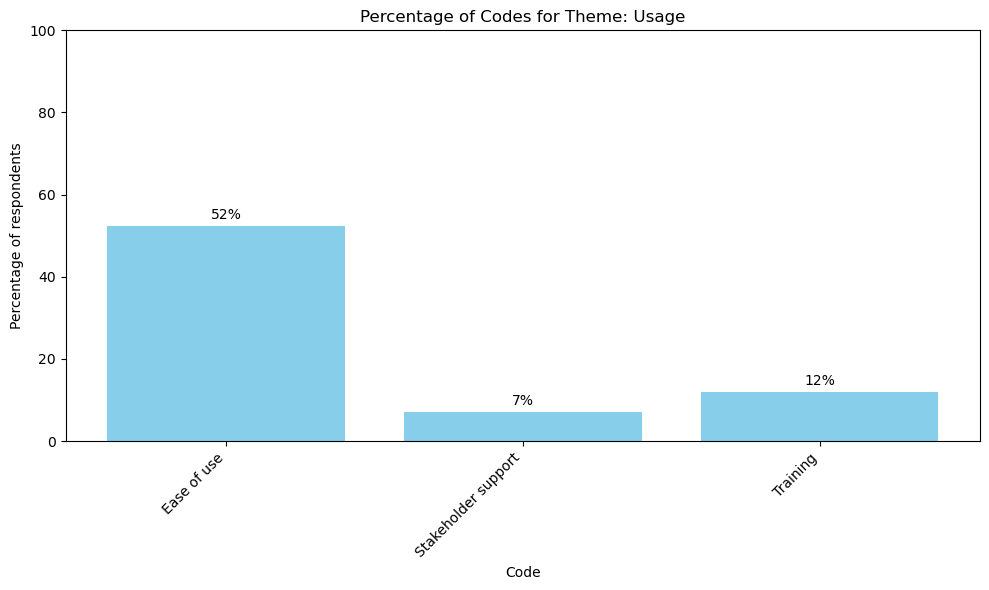

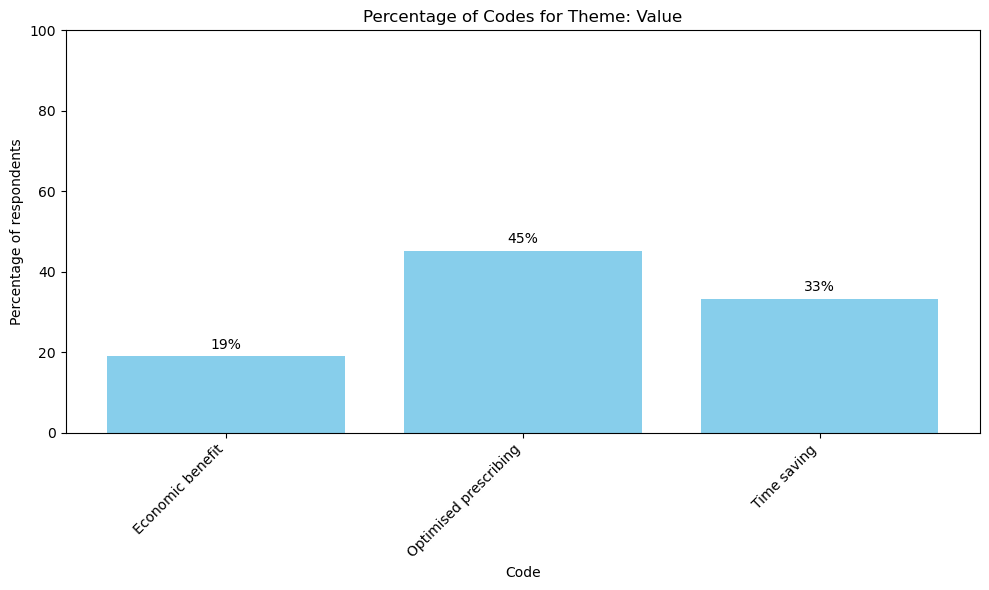

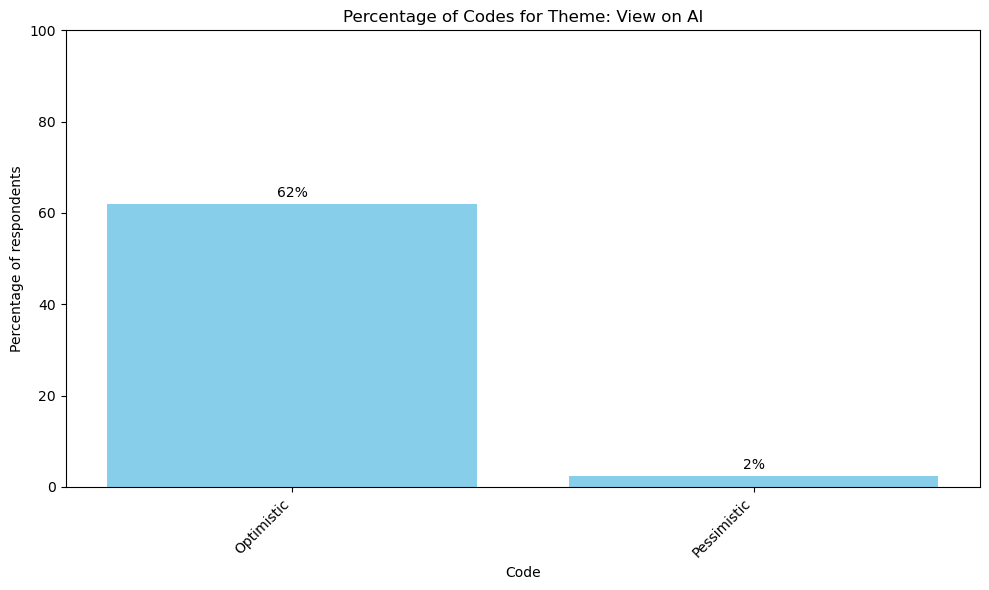

In [43]:
for theme in grouped_df.theme.unique():
    plot_theme_bar_chart(theme, grouped_df)

In [98]:
def plot_multiple_themes(themes, df):
    # Create subplots with 3 rows and 2 columns
    fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
    axs = axs.flatten()

    for i, theme in enumerate(themes):
        # Filter the DataFrame for the given theme
        theme_df = df[df['theme'] == theme]

        # Plot the bar chart
        bars = axs[i].bar(theme_df['code'], theme_df['percentage'], color='skyblue')
        
        # Set the y-axis label only for the leftmost plots
        if i % 2 == 0:  # Leftmost plots
            axs[i].set_ylabel('Percentage of respondents')
        
        # Set title for each subplot
        axs[i].set_title(f'Coding results for theme: {theme}')
        
        # Set y-axis limit
        axs[i].set_ylim(0, 100)
        
        # Rotate x-axis labels
        axs[i].tick_params(axis='x', rotation=45)
        for tick in axs[i].get_xticklabels():
            tick.set_ha('right')

        # Annotate bars with percentage values
        for bar in bars:
            height = bar.get_height()
            axs[i].annotate(f'{height:.0f}%',
                            xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    # Remove any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

In [96]:
grouped_df.theme.unique()

array(['Behavioural and social influences', 'Bottleneck',
       'Individualisation', 'Outcomes', 'Problem for AI',
       'Stewardship responsibilities', 'Technology', 'Trust', 'Usage',
       'Value', 'View on AI'], dtype=object)

In [100]:
grouped_df['theme'] = grouped_df['theme'].replace('Bottleneck', 'Bottlenecks')
grouped_df['theme'] = grouped_df['theme'].replace('Technology', 'Current technology')


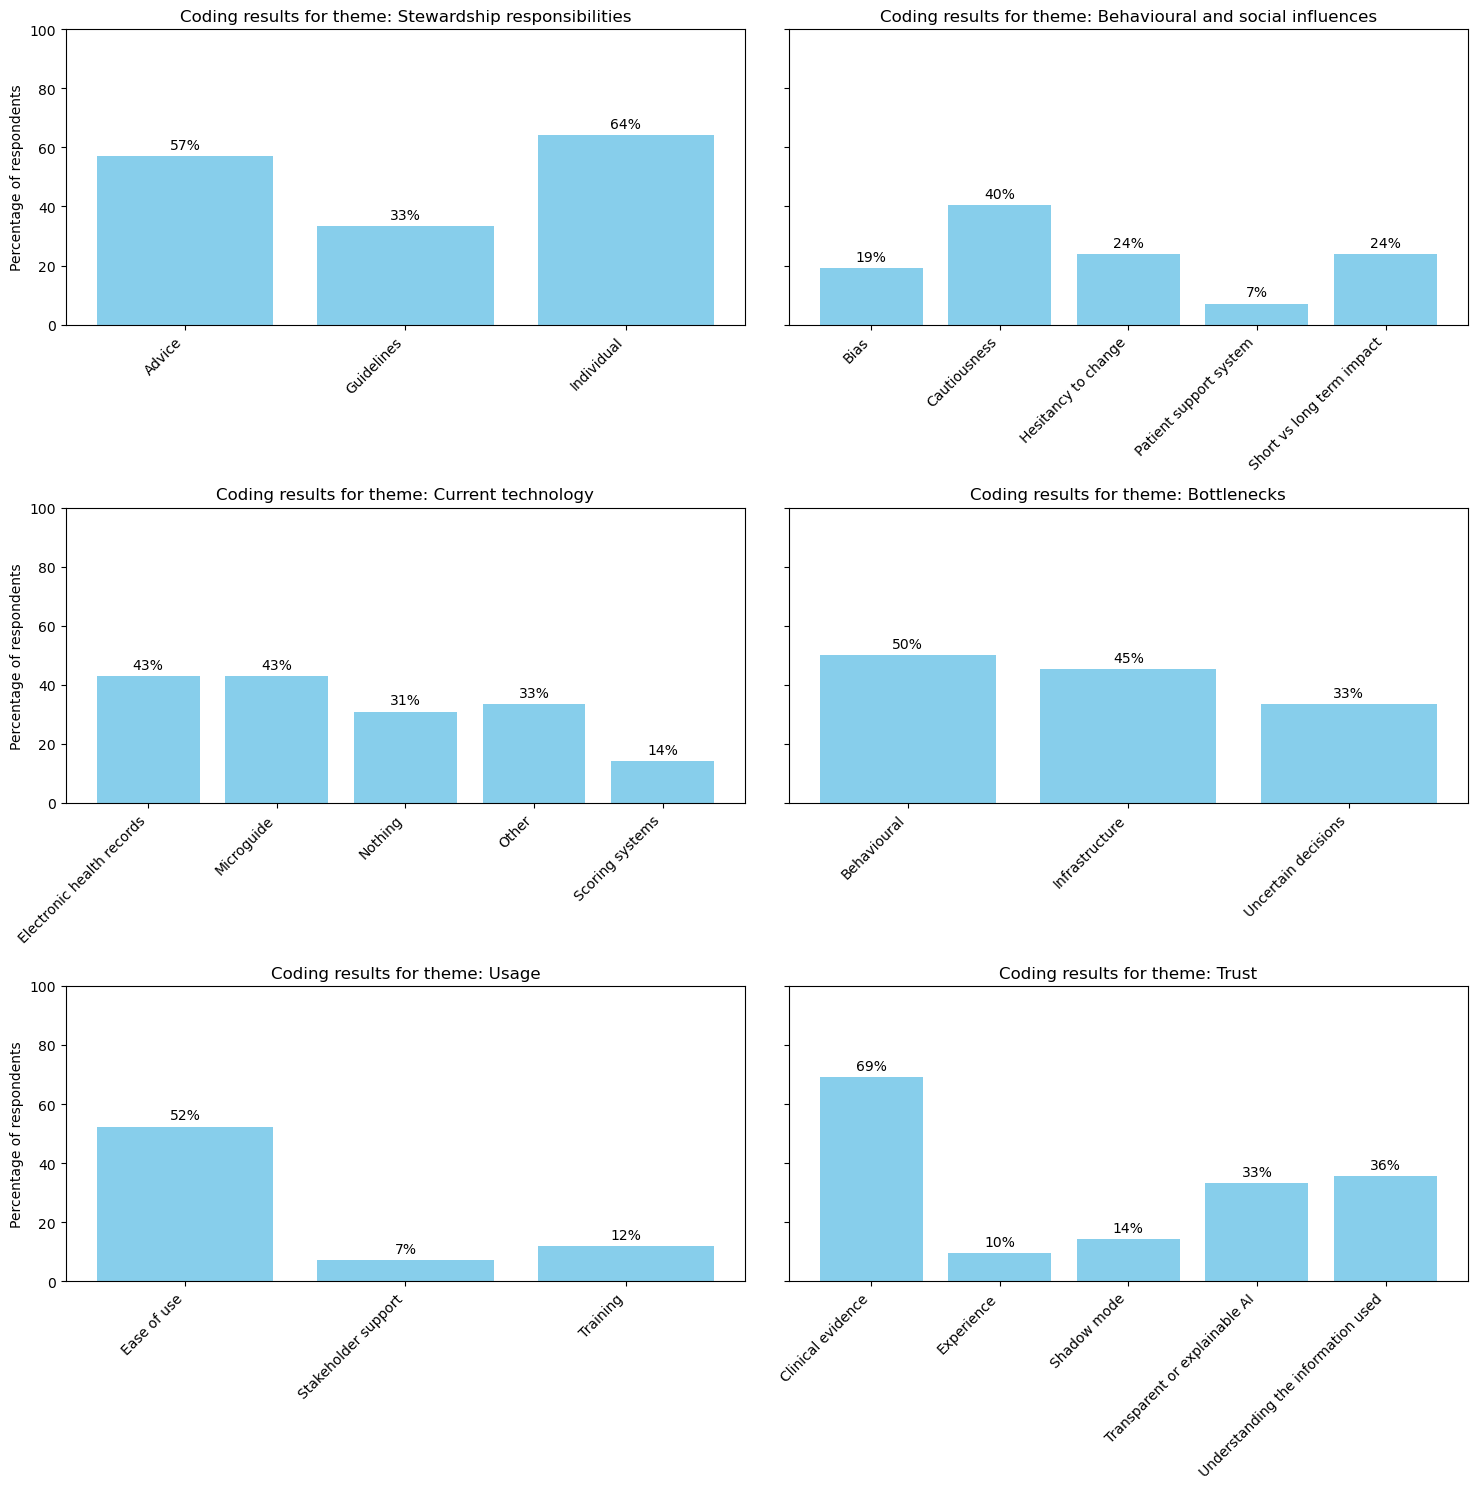

In [101]:
themes_to_plot = [
    'Stewardship responsibilities',
    #'Individualisation',
    'Behavioural and social influences',
    'Current technology',
    'Bottlenecks',
    'Usage',
    'Trust',
]

plot_multiple_themes(themes_to_plot, grouped_df)

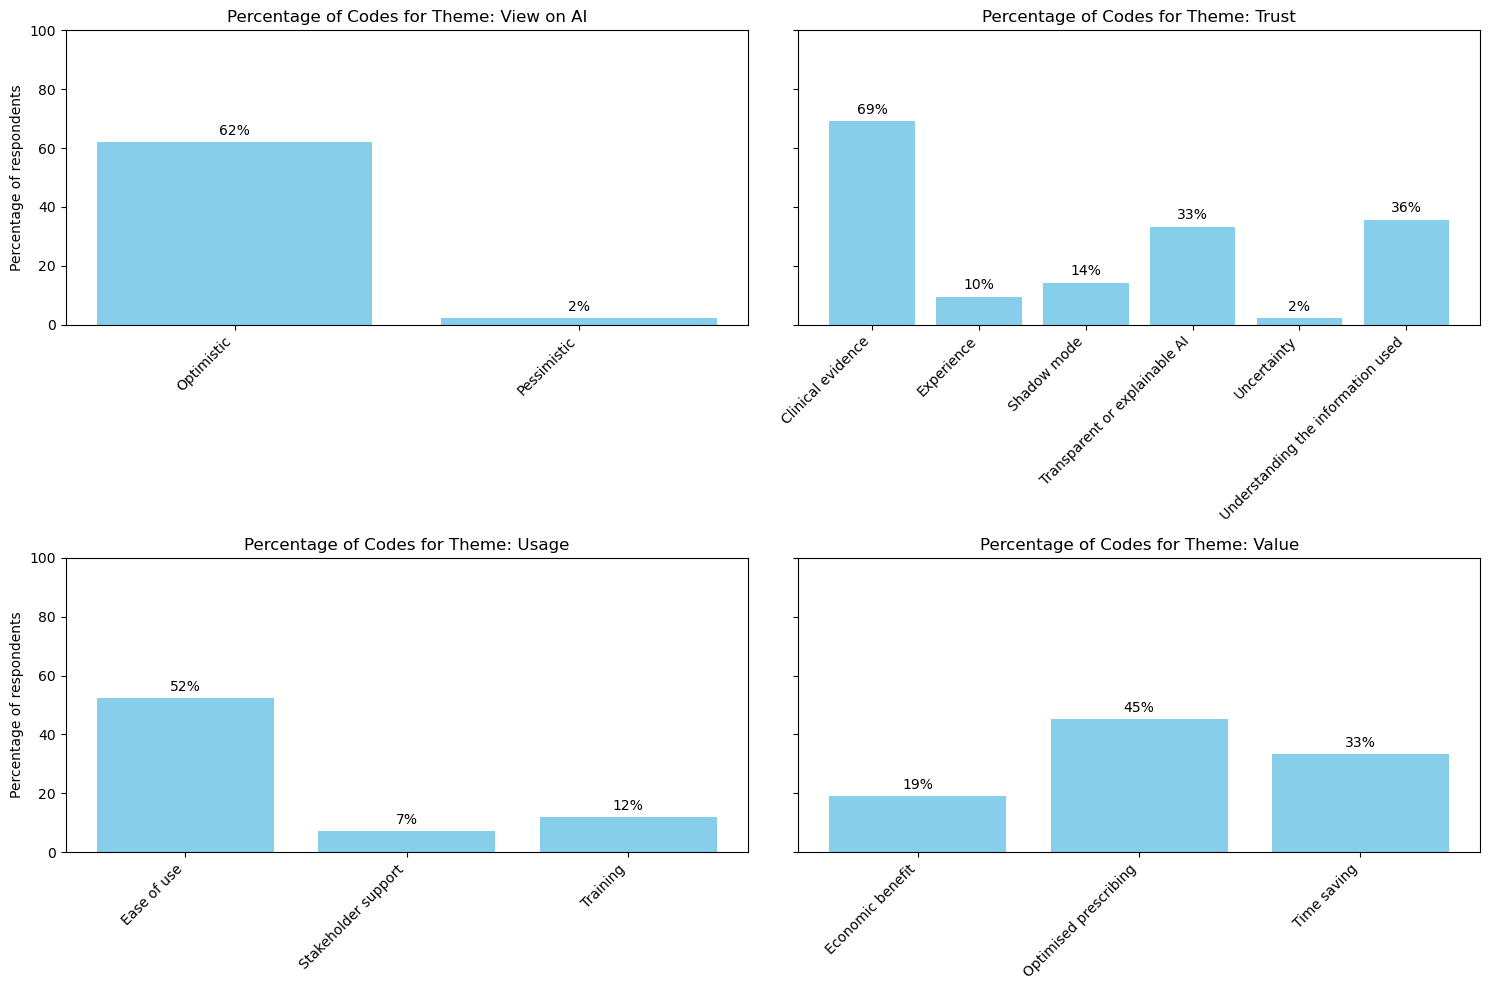

In [13]:
themes_to_plot = [
    'View on AI',
    'Trust',
    'Usage',
    'Value'
]

plot_multiple_themes(themes_to_plot, grouped_df)

# Correlation Analysis and Comparative Analysis

In [6]:
# Read CSV
demographics = pd.read_csv('demographic_results/demographics_processed.csv')
# Create df for demographic analysis
analysis_df['user_id'] = analysis_df['user_id'].astype(int)
analysis_demographics_df = analysis_df.merge(demographics[['user_id', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']])
# Imputation with Mode for categorical columns
analysis_demographics_df['age_new'].fillna(analysis_demographics_df['age_new'].mode()[0], inplace=True)
analysis_demographics_df['sex_new'].fillna(analysis_demographics_df['sex_new'].mode()[0], inplace=True)
analysis_demographics_df['medical_speciality_new'].fillna(analysis_demographics_df['medical_speciality_new'].mode()[0], inplace=True)
analysis_demographics_df['grade_new'].fillna(analysis_demographics_df['grade_new'].mode()[0], inplace=True)
analysis_demographics_df['ai_familiarity_new'].fillna(analysis_demographics_df['ai_familiarity_new'].mode()[0], inplace=True)

/tmp/ipykernel_11977/143100324.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['user_id'] = analysis_df['user_id'].astype(int)
/tmp/ipykernel_11977/143100324.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  analysis_demographics_df['age_new'].fillna(analysis_demographi

In [7]:
analysis_demographics_df

,user_id,theme,code,exists_in_text,user_archetype,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new
0,9,Stewardship responsibilities,Individual,0,b,40s,Male,Microbiology,Consultant,Slightly familiar
1,9,Stewardship responsibilities,Advice,1,b,40s,Male,Microbiology,Consultant,Slightly familiar
2,9,Stewardship responsibilities,Guidelines,0,b,40s,Male,Microbiology,Consultant,Slightly familiar
3,9,Individualisation,Quite individualised,0,b,40s,Male,Microbiology,Consultant,Slightly familiar
4,9,Individualisation,Not very individualised,0,b,40s,Male,Microbiology,Consultant,Slightly familiar
...,...,...,...,...,...,...,...,...,...,...
1801,32,Outcomes,Patient related outcomes,0,a,20s,Female,Other,Other,Slightly familiar
1802,32,Outcomes,Treatment failure rate,0,a,20s,Female,Other,Other,Slightly familiar
1803,32,Bottleneck,Infrastructure,1,a,20s,Female,Other,Other,Slightly familiar
1804,32,Bottleneck,Behavioural,0,a,20s,Female,Other,Other,Slightly familiar


In [8]:
# Group by
grouped_demographics_df = analysis_demographics_df.groupby(['theme', 'code', 'user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new'])['exists_in_text'].sum().reset_index()


In [9]:
grouped_demographics_df

,theme,code,user_archetype,age_new,sex_new,medical_speciality_new,grade_new,ai_familiarity_new,exists_in_text
0,Behavioural and social influences,Bias,a,20s,Female,Other,Other,Not familiar,0
1,Behavioural and social influences,Bias,a,20s,Female,Other,Other,Slightly familiar,1
2,Behavioural and social influences,Bias,a,30s,Female,Microbiology,Consultant,Slightly familiar,0
3,Behavioural and social influences,Bias,a,30s,Female,Pharmacist,Other,Slightly familiar,0
4,Behavioural and social influences,Bias,a,30s,Male,Infectious Diseases,Other,Moderately familiar,0
...,...,...,...,...,...,...,...,...,...
1586,View on AI,Pessimistic,b,40s,Male,Other,Consultant,Slightly familiar,0
1587,View on AI,Pessimistic,b,50s,Female,Infectious Diseases,Consultant,Not familiar,0
1588,View on AI,Pessimistic,b,50s,Female,Microbiology,Consultant,Moderately familiar,0
1589,View on AI,Pessimistic,b,50s,Male,Microbiology,Consultant,Slightly familiar,0


In [18]:
### With multiple comparison correction ###
from scipy.stats import chi2_contingency, fisher_exact
from statsmodels.stats.multitest import multipletests

# Function to perform Chi-Square test and Fisher's Exact test for each theme and demographic variable
def chi_square_fisher_test(df, themes, demographic_vars):
    results = []
    raw_p_values = []  # Store p-values for correction
    p_indices = []  # Store indices of valid p-values in results list

    for theme in themes:
        for demographic in demographic_vars:
            df_theme = df[df['theme'] == theme]
            df_pivot = df_theme.pivot_table(index=demographic, columns='code', values='exists_in_text', aggfunc='sum', fill_value=0)

            try:
                chi2, p, dof, ex = chi2_contingency(df_pivot)
                if (ex > 0).all():  # Check if all expected frequencies are greater than 0
                    results.append({
                        'theme': theme,
                        'demographic': demographic,
                        'test': 'Chi-Square',
                        'chi2': chi2,
                        'p_value': p,
                        'degrees_of_freedom': dof
                    })
                    raw_p_values.append(p)
                    p_indices.append(len(results) - 1)  # Track index of valid p-values
                else:
                    raise ValueError("Expected frequency of zero found")
            except ValueError:
                if df_pivot.shape == (2, 2):  # Check if the table is 2x2
                    _, p_value = fisher_exact(df_pivot)
                    results.append({
                        'theme': theme,
                        'demographic': demographic,
                        'test': 'Fisher',
                        'chi2': None,
                        'p_value': p_value,
                        'degrees_of_freedom': None
                    })
                    raw_p_values.append(p_value)
                    p_indices.append(len(results) - 1)  # Track index of valid p-values
                else:
                    results.append({
                        'theme': theme,
                        'demographic': demographic,
                        'test': 'None',
                        'chi2': None,
                        'p_value': None,
                        'degrees_of_freedom': None
                    })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Apply multiple comparison correction (only if we have valid p-values)
    if raw_p_values:
        # Apply correction method: 'bonferroni', 'holm', or 'fdr_bh'
        reject, corrected_p_values, _, _ = multipletests(raw_p_values, alpha=0.05, method='fdr_bh')

        # Insert corrected p-values back into the DataFrame at the correct indices
        for idx, corrected_p, reject_flag in zip(p_indices, corrected_p_values, reject):
            results_df.at[idx, 'p_corrected'] = corrected_p
            results_df.at[idx, 'reject'] = reject_flag

    return results_df

# Define themes and demographic variables
themes = grouped_demographics_df['theme'].unique()
demographic_vars = ['user_archetype', 'age_new', 'sex_new', 'medical_speciality_new', 'grade_new', 'ai_familiarity_new']

# Run the test with correction
chi_square_results = chi_square_fisher_test(grouped_demographics_df, themes, demographic_vars)


In [20]:
chi_square_results[['reject']].value_counts()
chi_square_results[['p_corrected']].value_counts()
chi_square_results
chi_square_results[chi_square_results['p_corrected'] < 0.5]


reject
False     63
Name: count, dtype: int64

p_corrected
1.000000       62
0.315238        1
Name: count, dtype: int64

,theme,demographic,test,chi2,p_value,degrees_of_freedom,p_corrected,reject
0,Behavioural and social influences,user_archetype,Chi-Square,1.261874,0.867810,4.0,1.0,False
1,Behavioural and social influences,age_new,Chi-Square,21.874959,0.147275,16.0,1.0,False
2,Behavioural and social influences,sex_new,Chi-Square,1.582159,0.811995,4.0,1.0,False
3,Behavioural and social influences,medical_speciality_new,Chi-Square,5.734882,0.928852,12.0,1.0,False
4,Behavioural and social influences,grade_new,Chi-Square,4.747712,0.314177,4.0,1.0,False
...,...,...,...,...,...,...,...,...
61,View on AI,age_new,None,NaN,NaN,NaN,NaN,NaN
62,View on AI,sex_new,Chi-Square,0.000000,1.000000,1.0,1.0,False
63,View on AI,medical_speciality_new,Chi-Square,2.466346,0.481404,3.0,1.0,False
64,View on AI,grade_new,Chi-Square,0.000000,1.000000,1.0,1.0,False


,theme,demographic,test,chi2,p_value,degrees_of_freedom,p_corrected,reject
33,Stewardship responsibilities,medical_speciality_new,Chi-Square,18.545716,0.005004,6.0,0.315238,False


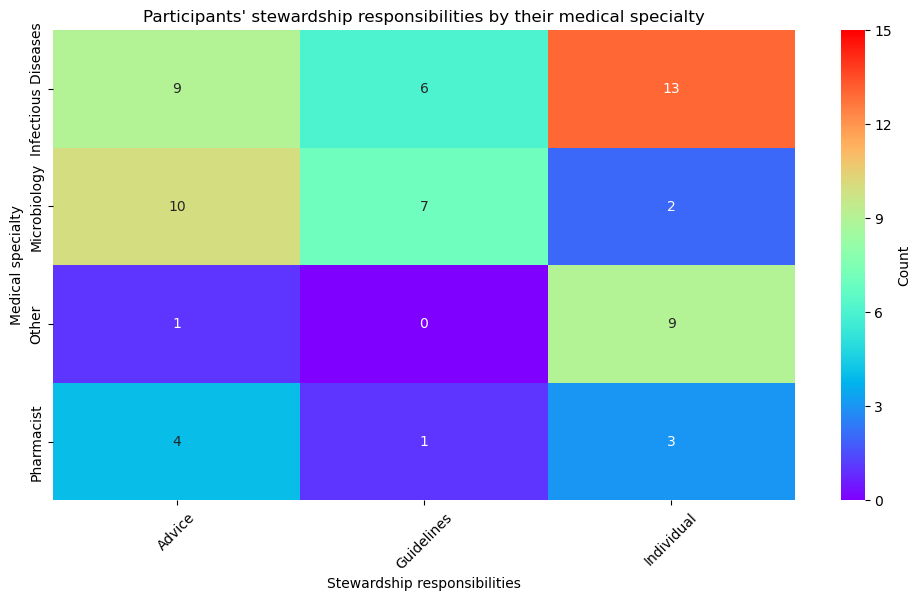

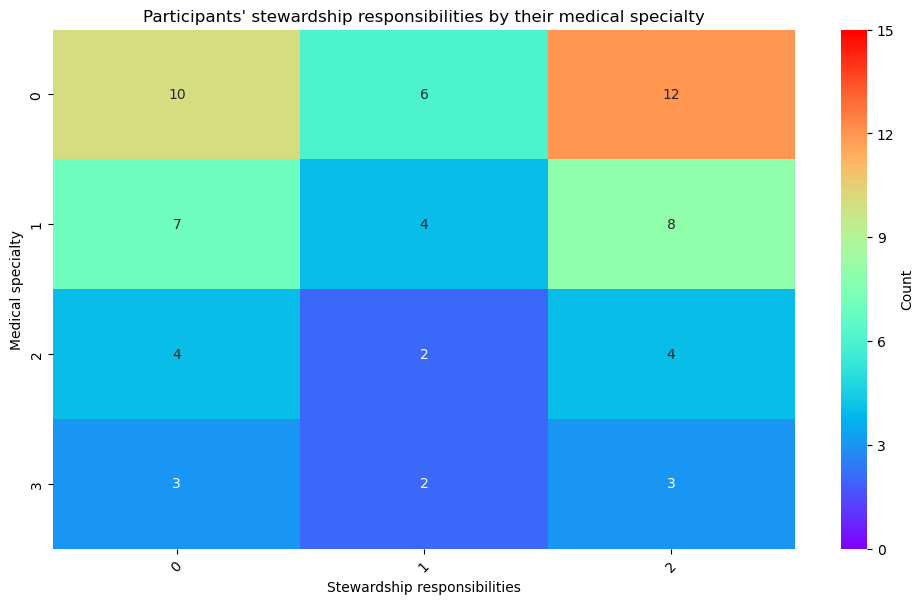

In [9]:
from matplotlib.colors import LinearSegmentedColormap

# Function to truncate a colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        'truncated_cmap', cmap(np.linspace(minval, maxval, n)))
    return new_cmap

def plot_heatmap(df_pivot, theme):
    # Choose a colormap and truncate it to focus on the central part
    original_cmap = plt.get_cmap('rainbow')
    truncated_cmap = truncate_colormap(original_cmap, 0.1, 0.8)
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_pivot, annot=True, fmt='d', cmap='rainbow', cbar_kws={'label': 'Count', 'ticks': np.linspace(0, 15, num=6)}, vmin=0, vmax=15)
    plt.xlabel('Stewardship responsibilities')
    plt.ylabel('Medical specialty')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.title("Participants' stewardship responsibilities by their medical specialty")
    plt.show()

# Example usage
for theme in significant_themes:
    for demographic in demographic_var:
        df_theme = grouped_demographics_df[grouped_demographics_df['theme'] == theme]
        df_pivot = df_theme.pivot_table(index=demographic, columns='code', values='exists_in_text', aggfunc='sum', fill_value=0)
        plot_heatmap(df_pivot, theme)
        chi2, p, dof, ex = chi2_contingency(df_pivot)
        expected = theme + ' expected'
        plot_heatmap(ex.round().astype(int), expected)


In [28]:
for index, row in sub_df.iterrows():
    df_theme = grouped_demographics_df[grouped_demographics_df['theme'] == row['theme']]
    print(row['theme'])
    df_pivot = df_theme.pivot_table(index=row['demographic'], columns='code', values='exists_in_text', aggfunc='sum', fill_value=0)
    df_pivot

Behavioural and social influences


code,Bias,Cautiousness,Hesitancy to change,Patient support system,Short vs long term impact
age_new,,,,,
20s,1,2,2,0,1
30s,4,4,5,1,5
40s,3,8,2,0,4
50s,0,2,0,2,0
60s,0,1,1,0,0


Problem for AI


code,Antimicrobial selection,Iv to oral switch,Risk classification,Treatment duration
medical_speciality_new,,,,
Infectious Diseases,3,4,1,7
Microbiology,1,5,4,0
Other,3,3,0,2
Pharmacist,4,5,2,3


Stewardship responsibilities


code,Advice,Guidelines,Individual
medical_speciality_new,,,
Infectious Diseases,9,6,13
Microbiology,10,7,2
Other,1,0,9
Pharmacist,4,1,3


Stewardship responsibilities


code,Advice,Guidelines,Individual
grade_new,,,
Consultant,14,12,16
Other,10,2,11


Usage


code,Ease of use,Stakeholder support,Training
user_archetype,,,
a,10,0,3
b,12,3,2


Usage


code,Ease of use,Stakeholder support,Training
medical_speciality_new,,,
Infectious Diseases,10,0,1
Microbiology,8,0,2
Other,1,2,1
Pharmacist,3,1,1


Most interesting findings: 

- Those with a medical speciality of other are not involved in creating guidelines (as exspected) !!! sig
- Consultants think people are cautious with regards to antimicrobial prescribing while for more junior doctors the greatest point noted was that the impact of AMR is further away than the direct patient you are caring for.  
- Problem for AI aligns with specialities with pharmacists wanting stewardship focused applications (selection and switch), micro wanting risk classification for screening to reduce workload while ID want to know when to safley stop and others wanting to know which antimicrobial to use
- Those with a grade of other (more juniour) are less involved with guideline generation (as exspected)
- Those whith a medical speciality of other think steakholder support is more important - infering they want a tool to be supported by the wider steakholders at the hospital such as the infection team and patients? 